In [1]:
using CSV
using DataFrames
using Clustering
using Plots
using Distances

In [2]:
data = CSV.read("Iris.csv", DataFrame)

Row,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,Int64,Float64,Float64,Float64,Float64,String15
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


In [3]:
names(data)

6-element Vector{String}:
 "Id"
 "SepalLengthCm"
 "SepalWidthCm"
 "PetalLengthCm"
 "PetalWidthCm"
 "Species"

In [4]:
petal = data[!, [:PetalWidthCm,:PetalLengthCm,:Species]]
sepal = data[!, [:SepalWidthCm,:SepalLengthCm,:Species]]

Row,SepalWidthCm,SepalLengthCm,Species
,Float64,Float64,String15
1,3.5,5.1,Iris-setosa
2,3.0,4.9,Iris-setosa
3,3.2,4.7,Iris-setosa
4,3.1,4.6,Iris-setosa
5,3.6,5.0,Iris-setosa
6,3.9,5.4,Iris-setosa
7,3.4,4.6,Iris-setosa
8,3.4,5.0,Iris-setosa
9,2.9,4.4,Iris-setosa


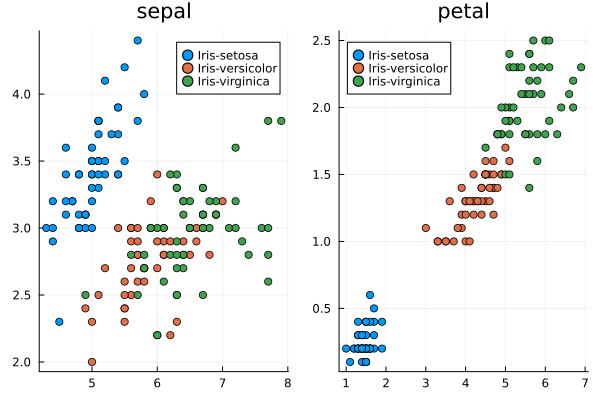

In [5]:

petal_g = scatter(data[!,"PetalLengthCm"],data[!,"PetalWidthCm"], 
group=petal[!,"Species"], title="petal"
)
sepal_g = scatter(sepal[!,"SepalLengthCm"],sepal[!,"SepalWidthCm"], 
group=sepal[!,"Species"], title="sepal"
)
plot(sepal_g,petal_g)

In [6]:
X = petal[!, [:PetalWidthCm,:PetalLengthCm,]]

Row,PetalWidthCm,PetalLengthCm
,Float64,Float64
1,0.2,1.4
2,0.2,1.4
3,0.2,1.3
4,0.2,1.5
5,0.2,1.4
6,0.4,1.7
7,0.3,1.4
8,0.2,1.5
9,0.2,1.4


In [7]:

c = kmeans(Matrix(X)',3)
#select!(petal,Not(:cluster3))
insertcols!(petal,3,:cluster3=>c.assignments)

Row,PetalWidthCm,PetalLengthCm,cluster3,Species
,Float64,Float64,Int64,String15
1,0.2,1.4,3,Iris-setosa
2,0.2,1.4,3,Iris-setosa
3,0.2,1.3,3,Iris-setosa
4,0.2,1.5,3,Iris-setosa
5,0.2,1.4,3,Iris-setosa
6,0.4,1.7,3,Iris-setosa
7,0.3,1.4,3,Iris-setosa
8,0.2,1.5,3,Iris-setosa
9,0.2,1.4,3,Iris-setosa


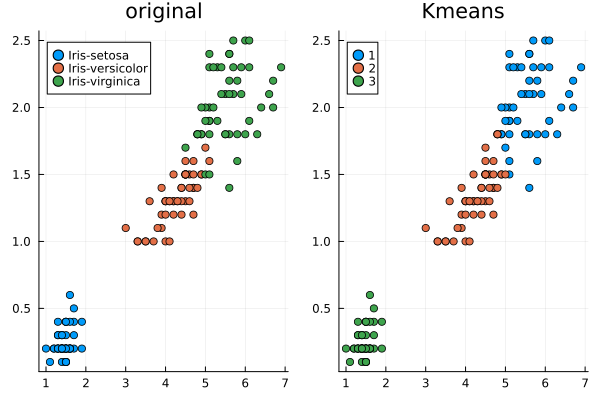

In [8]:
p1 = scatter(petal[!,"PetalLengthCm"],petal[!,"PetalWidthCm"], 
group=petal[!,"Species"], mode="markers", title="original"
)

p2 = scatter(petal[!,"PetalLengthCm"],petal[!,"PetalWidthCm"], 
group=petal[!,"cluster3"], mode="markers", title="Kmeans"
)
	
plot(p1,p2)


In [9]:
D=pairwise(Euclidean(),Matrix(X)',Matrix(X)', dims=2)

150×150 Matrix{Float64}:
 0.0       0.0       0.1       0.1       …  4.20476   4.51774   4.03113
 0.0       0.0       0.1       0.1          4.20476   4.51774   4.03113
 0.1       0.1       0.0       0.2          4.29535   4.60652   4.12311
 0.1       0.1       0.2       0.0          4.11461   4.42945   3.93954
 0.0       0.0       0.1       0.1          4.20476   4.51774   4.03113
 0.360555  0.360555  0.447214  0.282843  …  3.84838   4.15933   3.67696
 0.1       0.1       0.141421  0.141421     4.16293   4.47214   3.99249
 0.1       0.1       0.2       0.0          4.11461   4.42945   3.93954
 0.0       0.0       0.1       0.1          4.20476   4.51774   4.03113
 0.141421  0.141421  0.223607  0.1          4.15933   4.47772   3.98121
 ⋮                                       ⋱                      
 4.25441   4.25441   4.34166   4.16773      0.316228  0.3       0.5
 4.07185   4.07185   4.16293   3.98121      0.141421  0.5       0.1
 4.96588   4.96588   5.05668   4.87545      0.761577  

In [10]:
K = hclust(D)
l = cutree(K;k=3)
insertcols!(petal,4,:hclust=>l)

Row,PetalWidthCm,PetalLengthCm,cluster3,hclust,Species
,Float64,Float64,Int64,Int64,String15
1,0.2,1.4,3,1,Iris-setosa
2,0.2,1.4,3,1,Iris-setosa
3,0.2,1.3,3,1,Iris-setosa
4,0.2,1.5,3,1,Iris-setosa
5,0.2,1.4,3,1,Iris-setosa
6,0.4,1.7,3,1,Iris-setosa
7,0.3,1.4,3,1,Iris-setosa
8,0.2,1.5,3,1,Iris-setosa
9,0.2,1.4,3,1,Iris-setosa


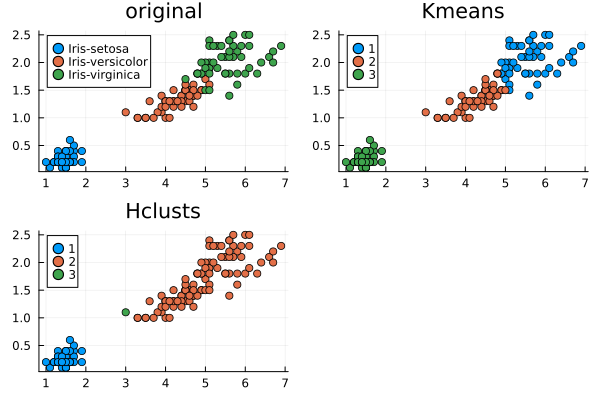

In [11]:
p3 = scatter(petal[!,"PetalLengthCm"],petal[!,"PetalWidthCm"], 
group=petal[!,"hclust"], mode="markers", title="Hclusts"
)
plot(p1,p2,p3)

In [31]:
L = dbscan(Matrix(X)',0.7, min_neighbors = 5, min_cluster_size = 30)
select!(petal,Not(:dbscan))
insertcols!(petal, 5, :dbscan=>L.assignments)

Row,PetalWidthCm,PetalLengthCm,cluster3,hclust,dbscan,Species
,Float64,Float64,Int64,Int64,Int64,String15
1,0.2,1.4,3,1,1,Iris-setosa
2,0.2,1.4,3,1,1,Iris-setosa
3,0.2,1.3,3,1,1,Iris-setosa
4,0.2,1.5,3,1,1,Iris-setosa
5,0.2,1.4,3,1,1,Iris-setosa
6,0.4,1.7,3,1,1,Iris-setosa
7,0.3,1.4,3,1,1,Iris-setosa
8,0.2,1.5,3,1,1,Iris-setosa
9,0.2,1.4,3,1,1,Iris-setosa


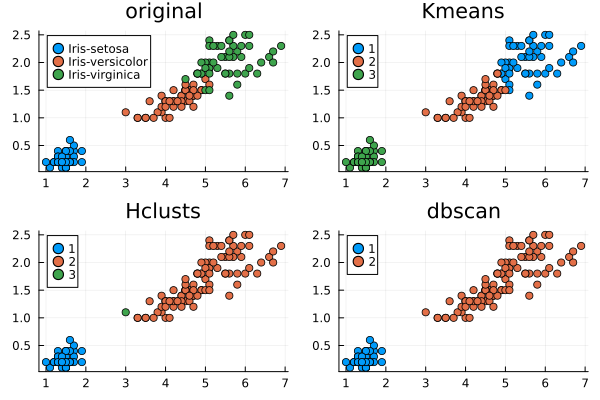

In [32]:
p4 = scatter(petal[!,"PetalLengthCm"],petal[!,"PetalWidthCm"], 
group=petal[!,"dbscan"], mode="markers", title="dbscan"
)
plot(p1,p2,p3,p4)